Analysis of the selection of the optimal network on my own data (architecture, time, acc)

24000


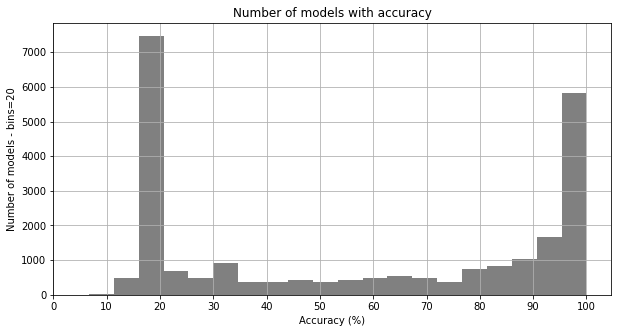

In [39]:
# Initial 24 000 models - details viz exp.py

import json
import matplotlib.pyplot as plt

# plot histogram of accuracy
with open('temp/experiments.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(len(data))
    acc = [data[key]['accuracy']*100 for key in data]
    plt.figure(figsize=(10, 5))
    plt.hist(acc, bins=20, color='gray')
    plt.xticks(range(0, 101, 10))
    plt.title('Number of models with accuracy')
    plt.xlabel('Accuracy (%)')
    plt.ylabel('Number of models - bins=20')
    plt.grid()
    plt.show()

In [40]:
# Selection of the best models

import json
with open('temp/experiments.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(len(data))
    best_models = []
    best_acc = max([data[key]['accuracy'] for key in data])
    for key in data:
        if data[key]['accuracy'] == best_acc:
            best_models.append(key)
    print(len(best_models))


24000
3915


In [1]:
# Selection of the best models from the best models selected above - they were trained with different seeds - details viz find_best.py

import json


with open('temp/experiments.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
best_of = {}
with open('temp/bests.json', 'r', encoding='utf-8') as f:
    file = json.load(f)
    for mod in file:
        score = sum(file[mod]['accuracy'])
        if score == 10.0:
            best_of[mod] = file[mod]
print(len(best_of))

# some models have same architecture, but different seed -> remove them
to_del = []
visited = []
for mod in list(best_of.keys()):
    for mod2 in list(best_of.keys()):
        if mod != mod2 and \
                mod.split('\t')[1] == mod2.split('\t')[1] and \
                mod.split('\t')[2] == mod2.split('\t')[2] and \
                mod.split('\t')[3] == mod2.split('\t')[3] and \
                mod.split('\t')[4] == mod2.split('\t')[4] and \
                mod.split('\t')[6] == mod2.split('\t')[6] and \
                visited.count(mod2) == 0:
            visited.append(mod2)
            to_del.append(mod2)
    visited.append(mod)

for mod in to_del:
    if mod in best_of:
        best_of.pop(mod)

print(len(best_of))

# find 10 best models with minimum time
best_of_best = {k: v for k, v in sorted(best_of.items(), key=lambda item: sum(item[1]['times']))}

best_of_best = dict(list(best_of_best.items())[:10])
print('Best time: ', sum(best_of_best[list(best_of_best.keys())[0]]['times']))
for best_model in best_of_best:
    print(best_model.split('\t')[0].replace('models/', ''))
    print('\tAccuracy: ', best_of_best[best_model]['accuracy'])
    print('\tTimes: ', best_of_best[best_model]['times'])
    print('\tParams: ', data[best_model])

2541
514
Best time:  0.26229429244995117
model_2023-03-02T18-48-33
	Accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
	Times:  [0.027925491333007812, 0.025929927825927734, 0.024933338165283203, 0.025928497314453125, 0.026929140090942383, 0.025928497314453125, 0.026927947998046875, 0.0249330997467041, 0.024932861328125, 0.027925491333007812]
	Params:  {'hidden_layers': 45, 'learning_rate': 0.01, 'epochs': 10, 'batch_size': 40, 'seed': 2, 'optimizer': 'Adam', 'accuracy': 1.0}
model_2023-03-02T17-53-48
	Accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
	Times:  [0.03191494941711426, 0.03191518783569336, 0.033908843994140625, 0.031914472579956055, 0.03291177749633789, 0.03291153907775879, 0.033908843994140625, 0.03191494941711426, 0.03390955924987793, 0.03390908241271973]
	Params:  {'hidden_layers': 20, 'learning_rate': 0.01, 'epochs': 15, 'batch_size': 40, 'seed': 0, 'optimizer': 'Adam', 'accuracy': 1.0}
model_2023-03-02T18-48-51
	Accuracy:  [1.0, 1.0, 1.0, 1.0, 1.

ERROR! Session/line number was not unique in database. History logging moved to new session 976


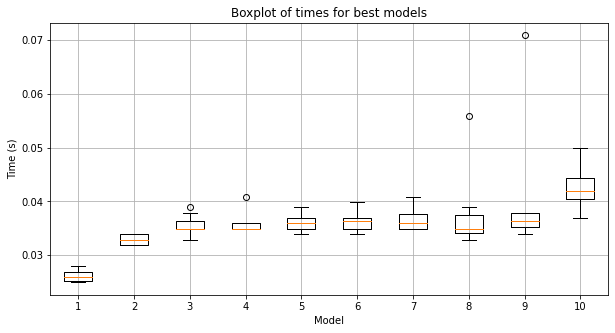

     Hidden layers  Learning rate  Epochs  Batch size Optimizer  \
1.              45           0.01      10          40      Adam   
2.              20           0.01      15          40      Adam   
3.              45           0.01      15          40      Adam   
4.              50           0.01      15          50      Adam   
5.              35           0.01      15          40      Adam   
6.              35           0.01      15          50      Adam   
7.              50           0.01      15          40      Adam   
8.              30           0.01      15          40      Adam   
9.              45           0.01      15          50      Adam   
10.             40           0.01      15          40      Adam   

     Average time [s]  Average accuracy  
1.              0.026               1.0  
2.              0.033               1.0  
3.              0.036               1.0  
4.              0.036               1.0  
5.              0.036               1.0  
6.        

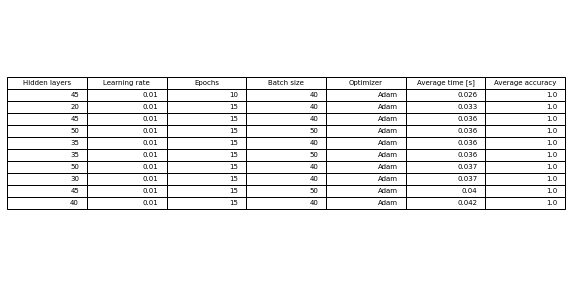

In [42]:
# boxplot of times for the 10 best models

import matplotlib.pyplot as plt
import numpy as np
times = []
for best_model in best_of_best:
    times.append(best_of_best[best_model]['times'])
plt.figure(figsize=(10, 5))
plt.boxplot(times, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.title('Boxplot of times for best models')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.grid()
plt.show()


# create table model parameters
import pandas as pd

table = pd.DataFrame()
for best_model in best_of_best:
    table = pd.concat([table, pd.DataFrame([[data[best_model]['hidden_layers'], data[best_model]['learning_rate'],data[best_model]['epochs'],data[best_model]['batch_size'],data[best_model]['optimizer'],round(np.mean(best_of_best[best_model]['times']),3),np.mean(best_of_best[best_model]['accuracy'])]])])
table.index = ['1.', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.', '10.']
table.columns = ['Hidden layers', 'Learning rate', 'Epochs', 'Batch size', 'Optimizer', 'Average time [s]', 'Average accuracy']
print(table)
# save table as image
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.table(cellText=table.values, colLabels=table.columns, loc='center')
# plt.savefig('temp/table.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

models/model_2023-03-02T18-48-33	45	0.01	10	40	2	Adam
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.027925491333007812, 0.025929927825927734, 0.024933338165283203, 0.025928497314453125, 0.026929140090942383, 0.025928497314453125, 0.026927947998046875, 0.0249330997467041, 0.024932861328125, 0.027925491333007812]
{'hidden_layers': 45, 'learning_rate': 0.01, 'epochs': 10, 'batch_size': 40, 'seed': 2, 'optimizer': 'Adam', 'accuracy': 1.0}


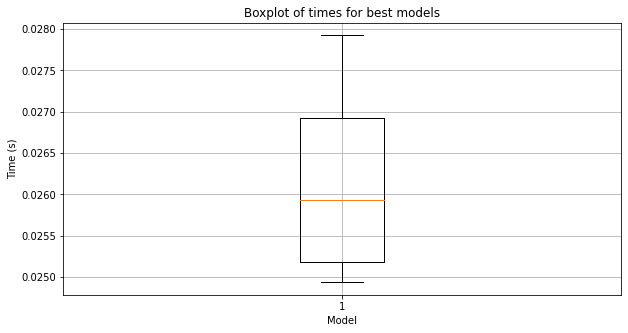

In [35]:
# print info about the best model

best_model = list(best_of_best.keys())[0]
print(best_model)
print(best_of_best[best_model]['accuracy'])
print(best_of_best[best_model]['times'])
print(data[best_model])


plt.figure(figsize=(10, 5))
plt.boxplot([best_of_best[best_model]['times']])
plt.title('Boxplot of times for best models')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.grid()
plt.show()
